In [1]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Mar_21_19:15:46_PDT_2021
Cuda compilation tools, release 11.3, V11.3.58
Build cuda_11.3.r11.3/compiler.29745058_0


In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Mar_21_19:15:46_PDT_2021
Cuda compilation tools, release 11.3, V11.3.58
Build cuda_11.3.r11.3/compiler.29745058_0
torch:  1.10 ; cuda:  cu113
detectron2: 0.6


In [3]:
pwd

'/home/rasheed_pf/Pythonprojects'

In [4]:
%cd BlendMask/AdelaiDet

/home/rasheed_pf/Pythonprojects/BlendMask/AdelaiDet


In [5]:
from utilis import *

In [6]:
val_json = "../../blendmask/AdelaiDet/datasets/coco/annotations/instances_val2017.json"
val_imgs = '../../blendmask/AdelaiDet/datasets/coco/val2017'


test_json = "../../blendmask/AdelaiDet/datasets/coco/annotations/instances_test2017.json"
test_imgs = '../../blendmask/AdelaiDet/datasets/coco/test2017'

train_json = "../../blendmask/AdelaiDet/datasets/coco/annotations/instances_train2017.json"
train_imgs = '../../blendmask/AdelaiDet/datasets/coco/train2017'

In [7]:
CLASS_NAMES = class_definition(["Last Tip Cutting", "Section Cutting", "V Cutting", "Bottom End", "Discarded Cutting"])

In [8]:
CLASS_NAMES


['Last Tip Cutting',
 'Section Cutting',
 'V Cutting',
 'Bottom End',
 'Discarded Cutting']

In [9]:
#To plot annotations using any of the plot functions in utilis.py the dataset_name must be registered. 'register_data_with_meta' function can be used 

register_data_with_meta('vacc_val', val_json, val_imgs, CLASS_NAMES)

In [11]:

register_data_with_meta('vacc_test', test_json, test_imgs, CLASS_NAMES)

In [9]:
register_data_with_meta('vacc_train', train_json, train_imgs, CLASS_NAMES)

In [10]:
val_json


'../../blendmask/AdelaiDet/datasets/coco/annotations/instances_val2017.json'

../../blendmask/AdelaiDet/datasets/coco/val2017/(1)_Plant_0212_Cam_180.png


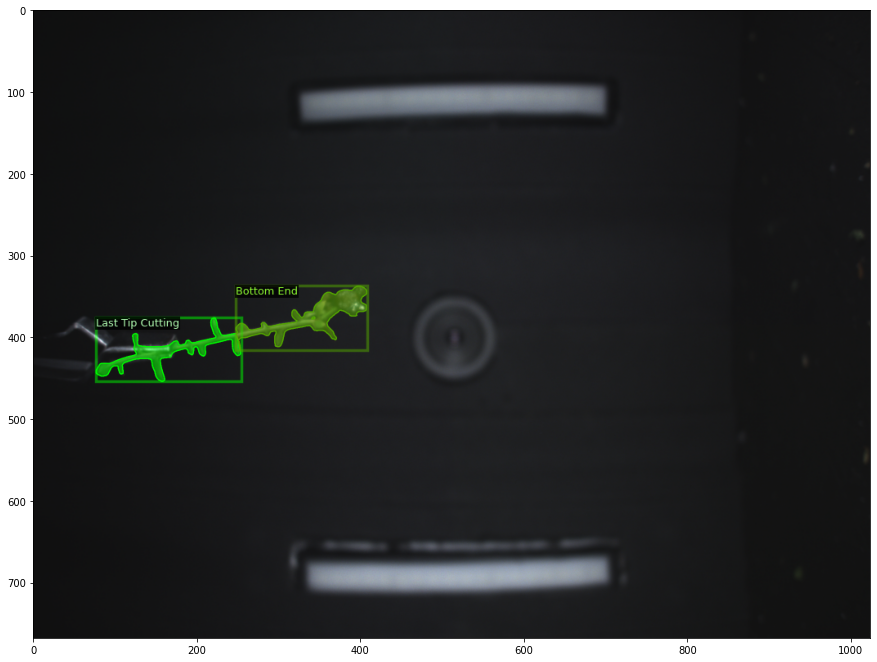

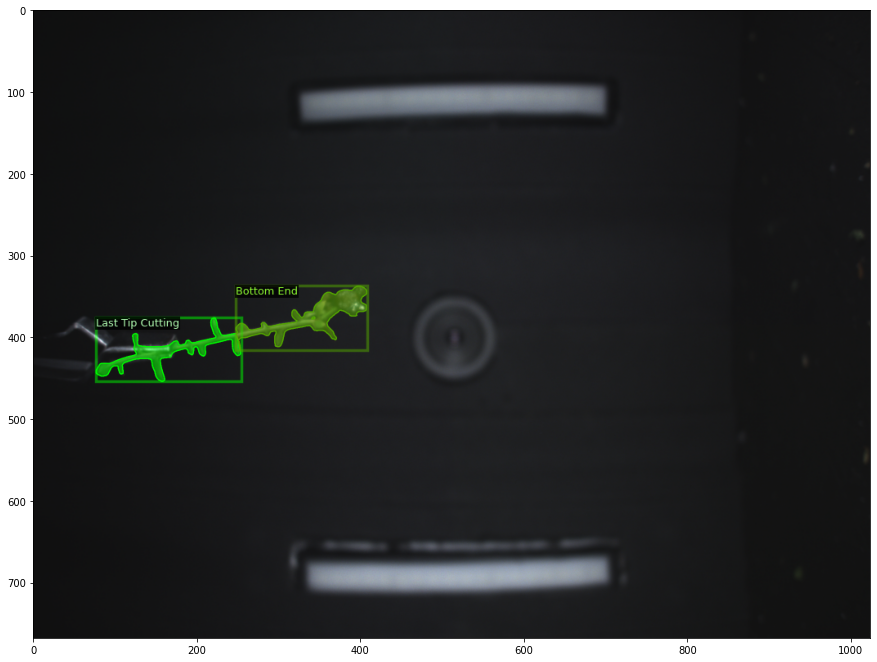

In [10]:
plot_samples('vacc_val', 0)

In [ ]:
plot_spec_anno_('vacc_val', '../../blendmask/AdelaiDet/datasets/coco/val2017/(1)_Plant_0010_Cam_000.png')

In [ ]:
#To plot ground truth of images in a dataset

plot_groundt_anno("vacc_test",'GT_test')

In [19]:
#to check if the configurations are in order, a demo can be run using a pre-trained model on an image. Here the specified model blendmask_r101_dcni3_5x.pth was used on an image containing 'Person' and 'Bicycle' 

!python demo/demo.py --config-file configs/BlendMask/R_101_dcni3_5x.yaml --input yes.jpeg --confidence-threshold 0.35 --opts MODEL.WEIGHTS ../../blendmask/AdelaiDet/blendmask_r101_dcni3_5x.pth

[04/15 15:50:01 detectron2]: Arguments: Namespace(config_file='configs/BlendMask/R_101_dcni3_5x.yaml', webcam=False, video_input=None, input=['yes.jpeg'], output=None, confidence_threshold=0.35, opts=['MODEL.WEIGHTS', '../../blendmask/AdelaiDet/blendmask_r101_dcni3_5x.pth'])
WARNING [04/15 15:50:01 d2.config.compat]: Config 'configs/BlendMask/R_101_dcni3_5x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[04/15 15:50:07 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                               | Names in Checkpoint                                                                                  | Shapes                                          |
|:---------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*            | backbone.bottom_up.res2.0.conv1.{

The checkpoint state_dict contains keys that are not used by the model:
  basis_module.seg_head.0.weight
  basis_module.seg_head.1.{bias, num_batches_tracked, running_mean, running_var, weight}
  basis_module.seg_head.3.weight
  basis_module.seg_head.4.{bias, num_batches_tracked, running_mean, running_var, weight}
  basis_module.seg_head.6.{bias, weight}
/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of n

In [19]:
#The trainig is done as follows. It is important to have the file hierachy conform with the cooco daasets

!OMP_NUM_THREADS=1 python tools/train_net.py \
    --config-file configs/BlendMask/R_50_1x.yaml \
    --num-gpus 1 \
    OUTPUT_DIR training_dir/vacci_train

Command Line Args: Namespace(config_file='configs/BlendMask/R_50_1x.yaml', resume=False, eval_only=False, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:50162', opts=['OUTPUT_DIR', 'training_dir/vacci_train'])
Config 'configs/BlendMask/R_50_1x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[02/26 12:55:18 detectron2]: Rank of current process: 0. World size: 1
[02/26 12:55:19 detectron2]: Environment info:
----------------------  ------------------------------------------------------------------------------------------------
sys.platform            linux
Python                  3.9.12 (main, Jun  1 2022, 11:38:51) [GCC 7.5.0]
numpy                   1.23.0
detectron2              0.6 @/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/detectron2
Compiler                GCC 9.4
CUDA compiler           CUDA 11.3
detectron2 arch flags   8.6
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.10.1+cu113 @/home/rasheed_pf

[02/26 12:55:19 detectron2]: Full config saved to training_dir/vacci_train/config.yaml
[02/26 12:55:19 d2.utils.env]: Using a generated random seed 20372041
[02/26 12:55:22 d2.engine.defaults]: Model:
BlendMask(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, 

    explicit_args = _get_args_from_config(from_config, *args, **kwargs)
  File "/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/detectron2/config/config.py", line 245, in _get_args_from_config
    ret = from_config_func(*args, **kwargs)
  File "/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/detectron2/data/build.py", line 344, in _train_loader_from_config
    dataset = get_detection_dataset_dicts(
  File "/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/detectron2/data/build.py", line 241, in get_detection_dataset_dicts
    dataset_dicts = [DatasetCatalog.get(dataset_name) for dataset_name in names]
  File "/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/detectron2/data/build.py", line 241, in <listcomp>
    dataset_dicts = [DatasetCatalog.get(dataset_name) for dataset_name in names]
  File "/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/detectron2/data/catalog.py", line 

In [ ]:
#inference_on_img(conf, yaml_file, weights, CLASS_NAMES,val_json, val_imgs, img):
inference_on_img(0.35, 'configs/BlendMask/R_50_1x.yaml', 'rle_all_aug_10k/model_final.pth', CLASS_NAMES,val_json, val_imgs, '../../blendmask/AdelaiDet/datasets/coco/test2017/(1)_Plant_0578_Cam_060.png')

In [23]:
#to check if the configurations are in order, a demo can be run using a pre-trained model on an image. Here the specified model blendmask_r101_dcni3_5x.pth was used on an image containing 'Person' and 'Bicycle' 

!python demo/demo.py --config-file configs/BlendMask/R_50_1x.yaml --input '../../blendmask/AdelaiDet/datasets/coco/val2017/(1)_Plant_0279_Cam_060.png' --confidence-threshold 0.35 --opts MODEL.WEIGHTS rle_all_aug_10k/model_final.pth

[04/15 09:47:07 detectron2]: Arguments: Namespace(config_file='configs/BlendMask/R_50_1x.yaml', webcam=False, video_input=None, input=['../../blendmask/AdelaiDet/datasets/coco/val2017/(1)_Plant_0279_Cam_060.png'], output=None, confidence_threshold=0.35, opts=['MODEL.WEIGHTS', 'rle_all_aug_10k/model_final.pth'])
WARNING [04/15 09:47:07 d2.config.compat]: Config 'configs/BlendMask/R_50_1x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[04/15 09:47:10 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                               | Names in Checkpoint                                                                                  | Shapes                                          |
|:---------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*            | bac

/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/rasheed_pf/.conda/envs/rasheed_vacci/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
[04/15 09:47:10 detectron2]: ../../blendmask/AdelaiDet/datasets/coco/val2017/(1)_Plant_0279_Cam_060.png: detected 3 instances in 0.43s


In [21]:
!python demo/demo_vacc.py --config-file configs/BlendMask/R_50_1x.yaml --input '../../blendmask/AdelaiDet/datasets/coco/val2017/(1)_Plant_0000_Cam_000.png'  --confidence-threshold 0.3 --opts MODEL.DEVICE cpu MODEL.WEIGHTS rle_all_aug_10k/model_final.pth

[04/15 15:52:17 detectron2]: Arguments: Namespace(config_file='configs/BlendMask/R_50_1x.yaml', webcam=False, video_input=None, input=['../../blendmask/AdelaiDet/datasets/coco/val2017/(1)_Plant_0000_Cam_000.png'], output=None, confidence_threshold=0.3, opts=['MODEL.DEVICE', 'cpu', 'MODEL.WEIGHTS', 'rle_all_aug_10k/model_final.pth'])
WARNING [04/15 15:52:17 d2.config.compat]: Config 'configs/BlendMask/R_50_1x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[04/15 15:52:17 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                               | Names in Checkpoint                                                                                  | Shapes                                          |
|:---------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.co

| basis_module.refine.2.1.*                    | basis_module.refine.2.1.{bias,num_batches_tracked,running_mean,running_var,weight}                   | (128,) () (128,) (128,) (128,)                  |
| basis_module.tower.0.0.weight                | basis_module.tower.0.0.weight                                                                        | (128, 128, 3, 3)                                |
| basis_module.tower.0.1.*                     | basis_module.tower.0.1.{bias,num_batches_tracked,running_mean,running_var,weight}                    | (128,) () (128,) (128,) (128,)                  |
| basis_module.tower.1.0.weight                | basis_module.tower.1.0.weight                                                                        | (128, 128, 3, 3)                                |
| basis_module.tower.1.1.*                     | basis_module.tower.1.1.{bias,num_batches_tracked,running_mean,running_var,weight}                    | (128,) () (128,) (128,) (128,)          

In [ ]:
#inference_on_dataset(conf, yaml_file, weights, CLASS_NAMES,val_json, val_imgs, test_imgs, path_to_save)

inference_on_dataset(0.3, 'configs/BlendMask/R_50_1x.yaml', 'training_dir/vac_aug_ISRF_10k_blendmask_R_50_1x/model_final.pth', CLASS_NAMES,val_json, val_imgs, test_imgs, 'predicaa')

In [10]:
comb_imgs('GT_test', 'predica', 'pred_gt_combo')